In [139]:
import pandas as pd
import matplotlib.pyplot as plt


In [140]:
# Load dataset
data = pd.read_excel('Airbnb_Open_Data.xlsx')

In [141]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [143]:
# 3. Drop columns with insufficient data
data = data.drop(columns=['house_rules', 'license'], errors='ignore')


In [144]:
# 4. Clean price and service_fee strings
# Remove $ and commas
data['price'] = data['price'].astype(str).str.replace(r'[\$,]', '', regex=True)
data['service fee'] = data['service fee'].astype(str).str.replace(r'[\$,]', '', regex=True)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [146]:
#REMOVE COLUMN 
data['price'] = data['price'].astype(str).str.replace(',', '', regex=False)
data['service fee'] = data['service fee'].astype(str).str.replace(',', '', regex=False)

In [147]:
data.rename(columns={'service fee': 'service_fee', 'price': 'price_$'}, inplace=True)

In [148]:
data.isna().sum()

id                                    0
NAME                                270
host id                               0
host_identity_verified              289
host name                           408
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price_$                               0
service_fee                           0
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

In [149]:
data.isna().sum()

id                                    0
NAME                                270
host id                               0
host_identity_verified              289
host name                           408
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price_$                               0
service_fee                           0
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [151]:
#change all mismatched data to the appropriate data type
data['price_$'] = data['price_$'].astype(float)
data['service_fee'] = data['service_fee'].astype(float)
data['id'] = data['id'].astype(str)
data['host id'] = data['host id'].astype(str)
data['last review'] = pd.to_datetime(data['last review'], errors='coerce')
data['Construction year'] = data['Construction year'].astype(int, errors='ignore')


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  object        
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  object        
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [153]:
data.isnull().sum()

id                                    0
NAME                                270
host id                               0
host_identity_verified              289
host name                           408
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price_$                             247
service_fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

In [154]:
# Drop all rows with null values
data = data.dropna()

In [155]:
data.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price_$                           0
service_fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83856 entries, 0 to 102597
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83856 non-null  object        
 1   NAME                            83856 non-null  object        
 2   host id                         83856 non-null  object        
 3   host_identity_verified          83856 non-null  object        
 4   host name                       83856 non-null  object        
 5   neighbourhood group             83856 non-null  object        
 6   neighbourhood                   83856 non-null  object        
 7   lat                             83856 non-null  float64       
 8   long                            83856 non-null  float64       
 9   country                         83856 non-null  object        
 10  country code                    83856 non-null  object        
 11  instan

In [157]:
data.loc[ data['neighbourhood group'] == 'Brookln', 'neighbourhood group'] = 'Brooklyn'

In [158]:
data=data.drop(data[data['availability 365']>500].index)

In [159]:
data.duplicated().sum()

466

In [160]:
data.drop_duplicates(inplace=True)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

In [162]:
data.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


In [163]:
property_type_counts = data['room type'].value_counts().to_frame()
property_type_counts

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


Text(0, 0.5, 'Count')

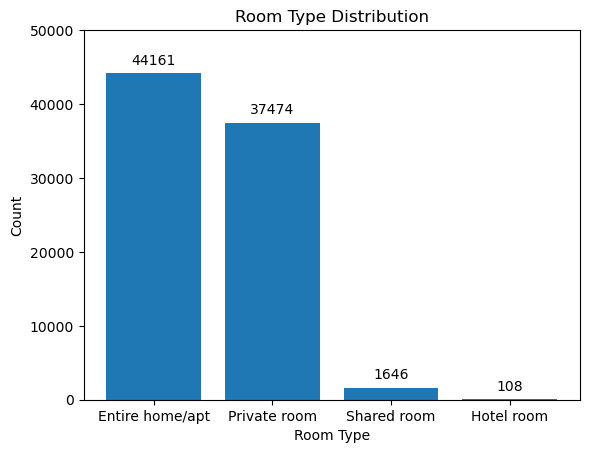

In [164]:
#Room type count plotted on a barchart
room_type_bar=plt.bar(property_type_counts.index, property_type_counts.loc[:,'count']);
plt.bar_label(room_type_bar,labels=property_type_counts['count'],padding=4)
plt.ylim(0,50000)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')

In [165]:
# neighbourhood group bar plot
h_group = data['neighbourhood group'].value_counts().to_frame()
h_group.reset_index(inplace=True)
h_group.columns = ['neighbourhood group', 'count']
h_group

,neighbourhood group,count
0,Brooklyn,34621
1,Manhattan,34560
2,Queens,11124
3,Bronx,2267
4,Staten Island,816
5,brookln,1


Text(0, 0.5, 'Count')

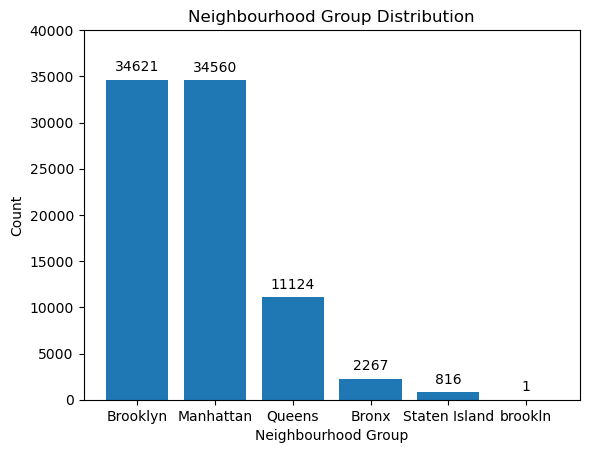

In [166]:
#Which neighborhood group has the highest number of listings?

neighbourhood_group_bar=plt.bar(h_group['neighbourhood group'], h_group['count']);
plt.bar_label(neighbourhood_group_bar,labels=h_group['count'],padding=4)
plt.ylim(0,40000)
plt.title('Neighbourhood Group Distribution')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Queens'),
  Text(1, 0, 'Bronx'),
  Text(2, 0, 'Brooklyn'),
  Text(3, 0, 'Manhattan'),
  Text(4, 0, 'Staten Island'),
  Text(5, 0, 'brookln')])

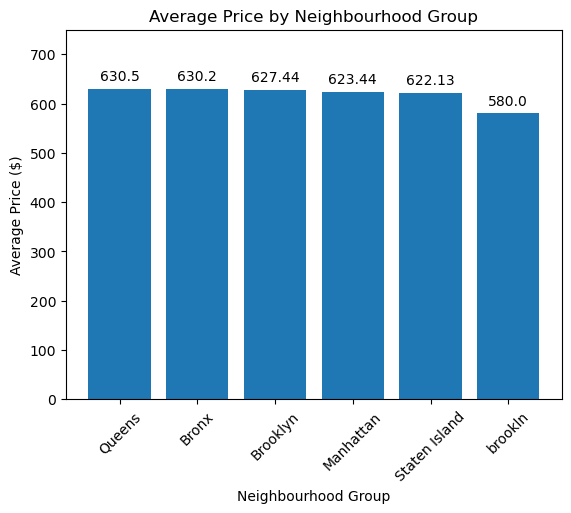

In [167]:
#Which neighborhoods group have the highest average prices for Airbnb listings?
avg_price = data.groupby('neighbourhood group')['price_$'].mean().reset_index().sort_values(by='price_$', ascending=False)
avg_price_bar = plt.bar(avg_price['neighbourhood group'], avg_price['price_$'])
plt.bar_label(avg_price_bar, labels=round(avg_price['price_$'], 2), label_type='edge', padding=4)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')   
plt.ylabel('Average Price ($)')
plt.ylim(0,750)
plt.xticks(rotation=45)

<module 'matplotlib.pyplot' from 'c:\\Users\\HP\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

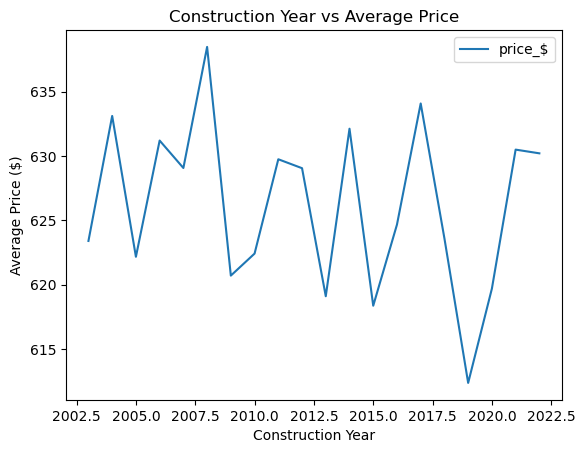

In [168]:
#Is there a relationship between the construction year of property and price?

construction_year_price = data.groupby(data['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Construction Year vs Average Price')
plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Michael'),
  Text(1, 0, 'David'),
  Text(2, 0, 'John'),
  Text(3, 0, 'Alex'),
  Text(4, 0, 'Karen'),
  Text(5, 0, 'Sonder (NYC)'),
  Text(6, 0, 'Maria'),
  Text(7, 0, 'Daniel'),
  Text(8, 0, 'Sarah'),
  Text(9, 0, 'Anna')])

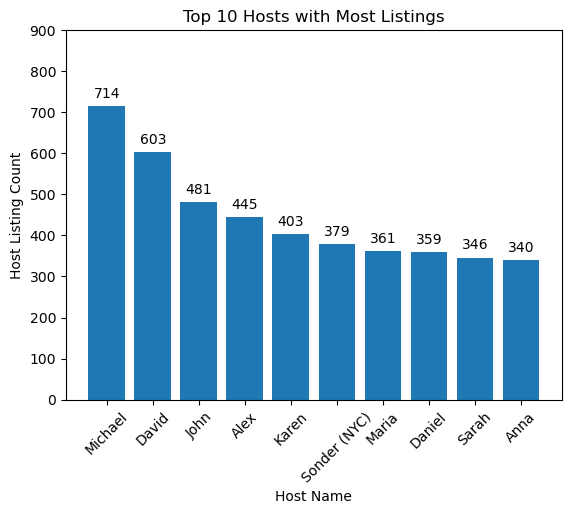

In [169]:
#who are the top 10 hosts with the most listings?
host=data.groupby('host name')['calculated host listings count'].count().sort_values(ascending=False).nlargest(10).to_frame()
host_bar=plt.bar(host.index,host['calculated host listings count'])
plt.bar_label(host_bar,labels=host['calculated host listings count'],padding=4)
plt.title('Top 10 Hosts with Most Listings')    
plt.xlabel('Host Name')
plt.ylabel('Host Listing Count')
plt.ylim(0,900)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sonder (NYC)'),
  Text(1, 0, 'Karen'),
  Text(2, 0, 'Jeniffer'),
  Text(3, 0, 'Blueground'),
  Text(4, 0, 'Kaz'),
  Text(5, 0, 'Corporate Housing'),
  Text(6, 0, 'Soya'),
  Text(7, 0, 'Stay With Vibe'),
  Text(8, 0, 'Kara'),
  Text(9, 0, 'Jeremy & Laura')])

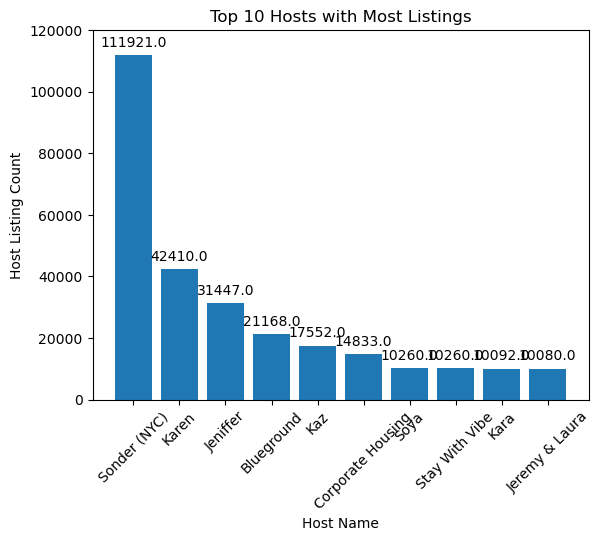

In [170]:
#who are the top 10 hosts with the most listings?
host=data.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
host_bar=plt.bar(host.index,host['calculated host listings count'])
plt.bar_label(host_bar,labels=host['calculated host listings count'],padding=4)
plt.title('Top 10 Hosts with Most Listings')    
plt.xlabel('Host Name')
plt.ylabel('Host Listing Count')
plt.ylim(0,120000)
plt.xticks(rotation=45)

In [171]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service_fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [172]:
#Are hosts with verified identities more likely to receive positive reviews?
review = data.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


([0, 1], [Text(0, 0, 'verified'), Text(1, 0, 'unconfirmed')])

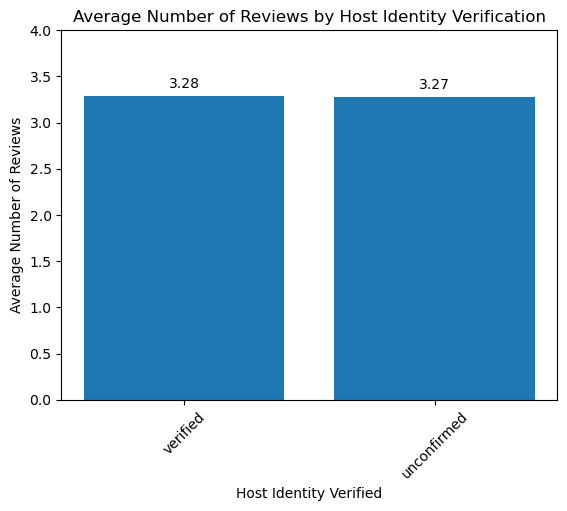

In [173]:
review_bar=plt.bar(review.index,review['review rate number'])
plt.bar_label(review_bar,labels=round(review['review rate number'],2),padding=4)
plt.title('Average Number of Reviews by Host Identity Verification')
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Number of Reviews')
plt.ylim(0,4)
plt.xticks(rotation=45)

In [174]:
#Is there a correlation between the price of a listing and its service fee?
data['price_$'].corr(data['service_fee'])

0.9999909082976476

<module 'matplotlib.pyplot' from 'c:\\Users\\HP\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

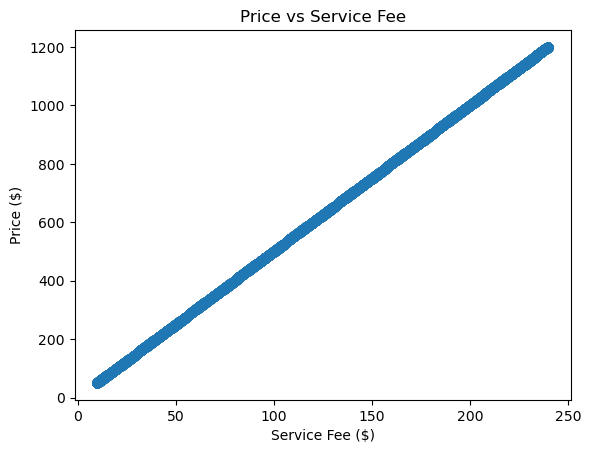

In [175]:
sns.regplot(x='service_fee', y='price_$', data=data)
plt.xlabel('Service Fee ($)')
plt.ylabel('Price ($)')
plt.title('Price vs Service Fee')
plt

In [176]:
#What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
avg_rate_review_no = data.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
avg_rate_review_no

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274728
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286
brookln             Private room               4.000000

<module 'matplotlib.pyplot' from 'c:\\Users\\HP\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

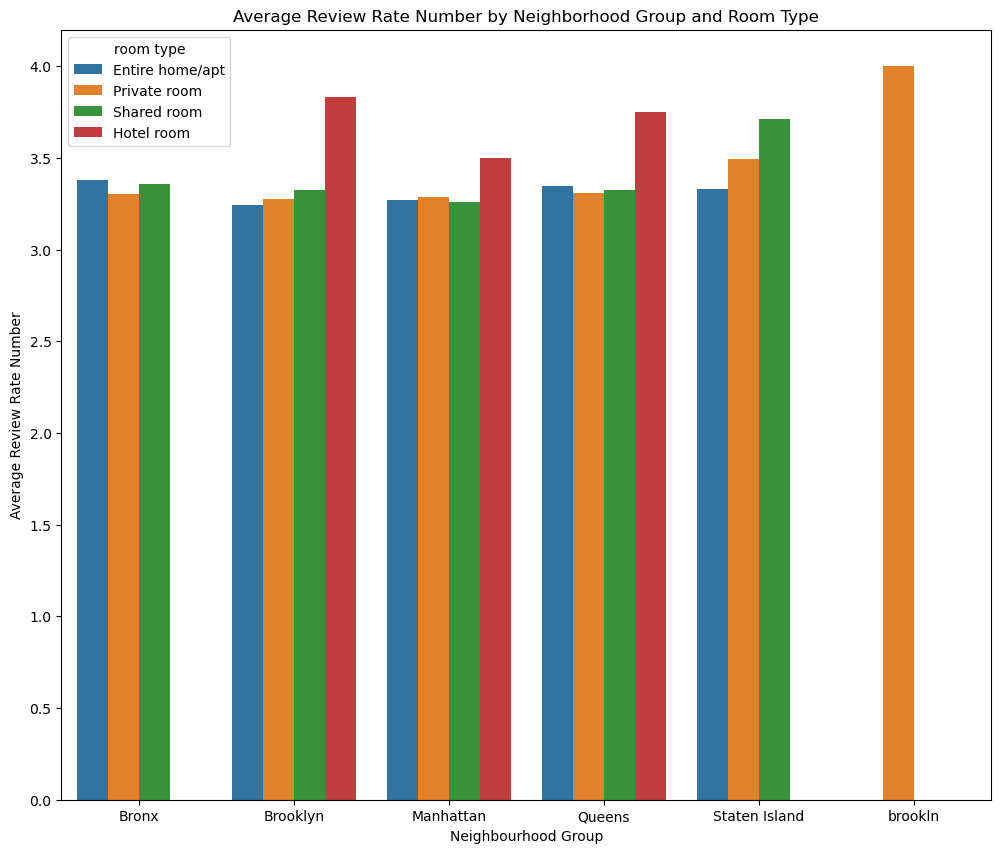

In [177]:
plt.figure(figsize=(12,10))
sns.barplot(x=avg_rate_review_no.index.get_level_values(0), y='review rate number', hue=avg_rate_review_no.index.get_level_values(1), data=avg_rate_review_no.reset_index())
plt.title('Average Review Rate Number by Neighborhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate Number')
plt

Text(0.5, 1.0, 'A regression plot showing the relationship between Calculated Host Listings Count and Availability 365')

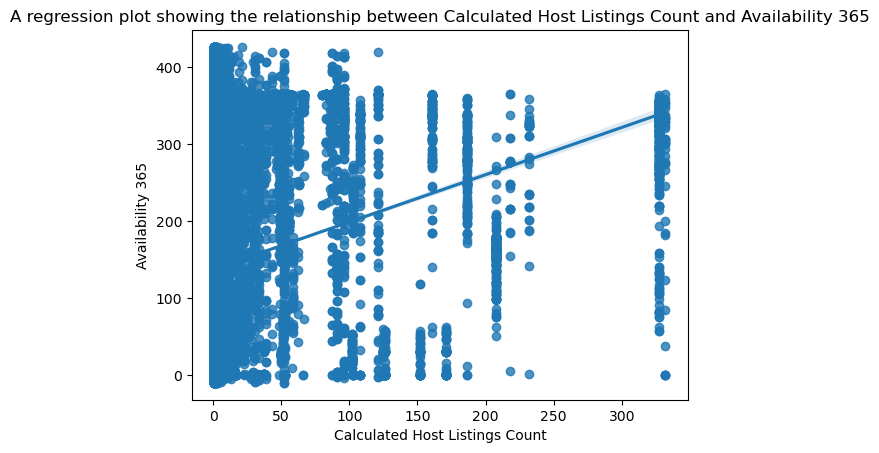

In [178]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(x='calculated host listings count', y='availability 365', data=data)
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.title('A regression plot showing the relationship between Calculated Host Listings Count and Availability 365')


In [179]:
data['calculated host listings count'].corr(data['availability 365'])

0.1359971471570338